In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import zscore
import os


In [14]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
df.describe()

,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [15]:
df.head

<bound method NDFrame.head of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  \


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


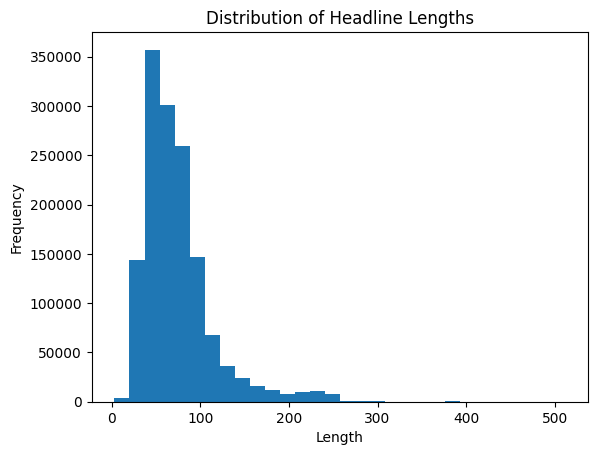

In [16]:
# Calculate headline lengths
df['headline_length'] = df['headline'].str.len()

# Basic stats
print(df['headline_length'].describe())

# Optional: Plot histogram
import matplotlib.pyplot as plt
plt.hist(df['headline_length'], bins=30)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


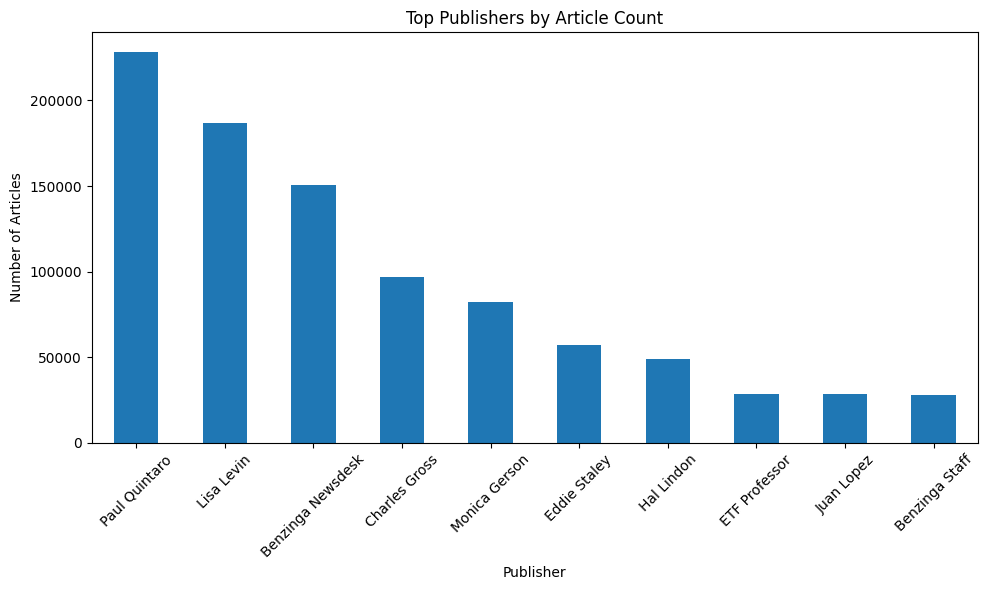

In [17]:
# B. Count Number of Articles per Publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts.head(10))

# Optional: Bar chart
publisher_counts.head(10).plot(kind='bar', figsize=(10,6))
plt.title("Top Publishers by Article Count")
plt.xlabel("Publisher")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
print(df.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock',
       'headline_length'],
      dtype='object')


In [19]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Optional: check for any NaT values
print(df[df['date'].isna()])

         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/1609

In [20]:
print(df['date'].head())

0   2020-06-05 10:30:54-04:00
1   2020-06-03 10:45:20-04:00
2   2020-05-26 04:30:07-04:00
3   2020-05-22 12:45:06-04:00
4   2020-05-22 11:38:59-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]



[Publisher Activity]
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


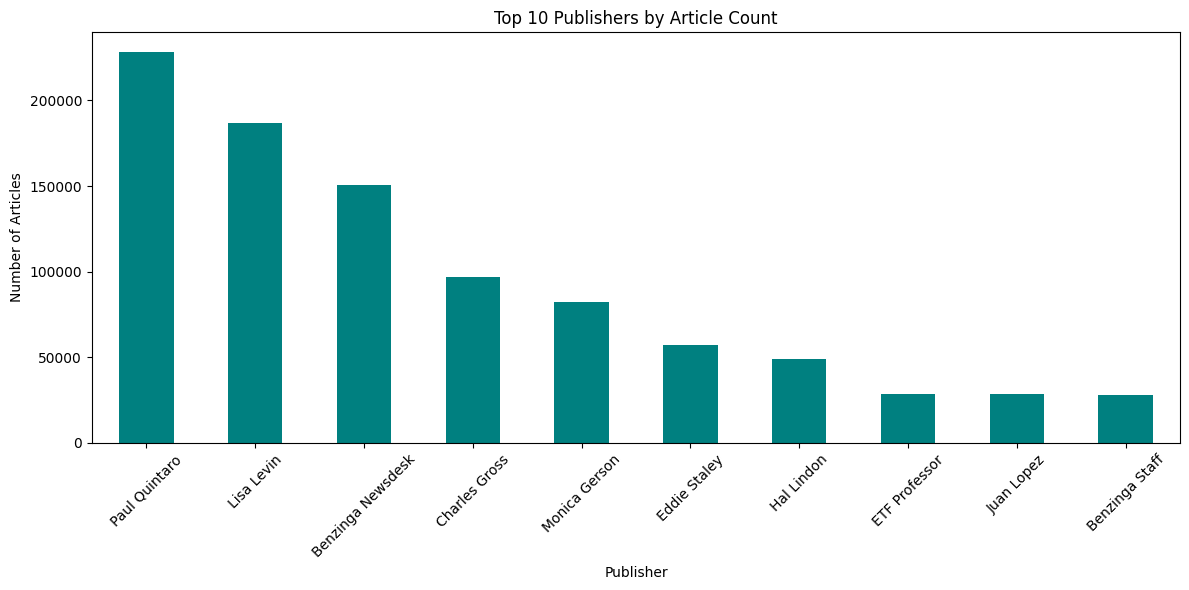

In [21]:
# 3. Count Number of Articles per Publisher
# -------------------------------
publisher_counts = df['publisher'].value_counts()

print("\n[Publisher Activity]")
print(publisher_counts.head(10))

# Plot top publishers
publisher_counts.head(10).plot(kind='bar', figsize=(12, 6), color='teal')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


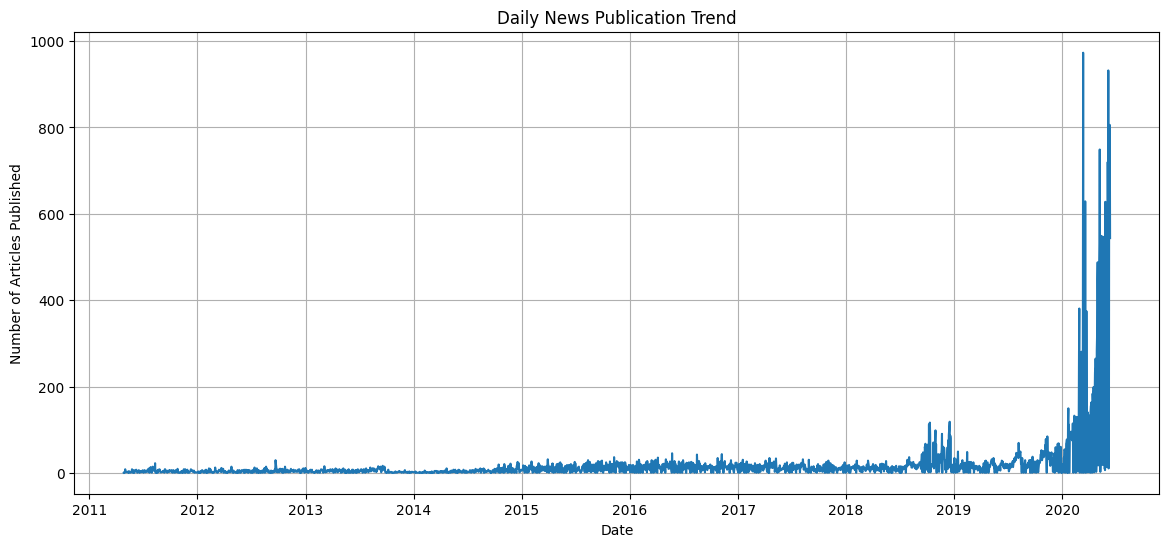

In [22]:
# 4. Analyze Publication Dates
# -------------------------------

# Convert 'date' to datetime format safely
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract date parts
df['publish_date'] = df['date'].dt.date
df['publish_day'] = df['date'].dt.day_name()   # Monday, Tuesday, etc.
df['publish_month'] = df['date'].dt.month_name()  # January, February, etc.

# Daily article count
daily_trend = df.groupby('publish_date').size()

# Plot daily trend
plt.figure(figsize=(14, 6))
daily_trend.plot(kind='line', title='Daily News Publication Trend')
plt.xlabel('Date')
plt.ylabel('Number of Articles Published')
plt.grid(True)
plt.show()

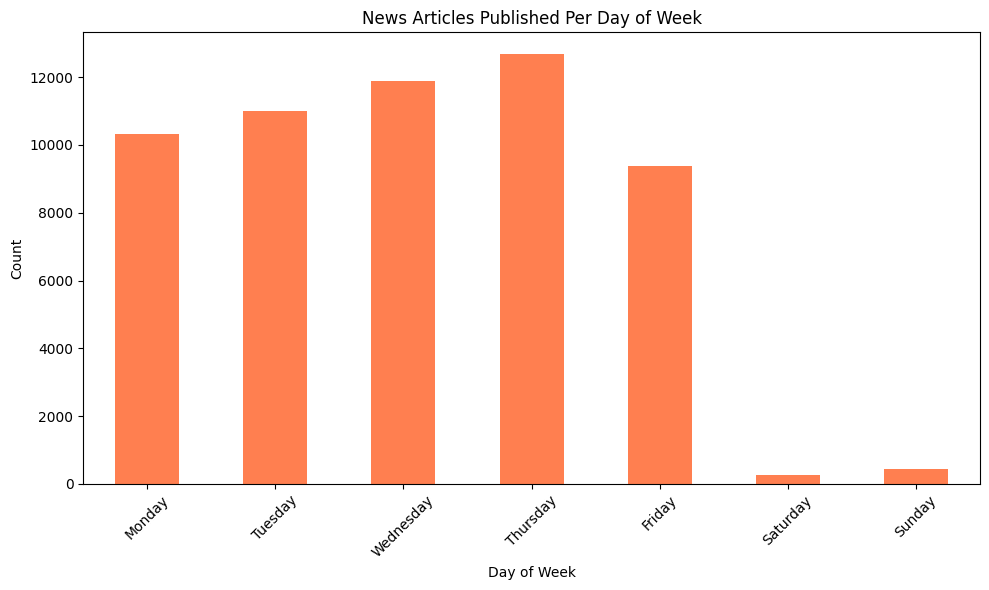

In [23]:
# Weekly day distribution
day_trend = df['publish_day'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot by weekday
day_trend.plot(kind='bar', figsize=(10, 6), color='coral')
plt.title('News Articles Published Per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

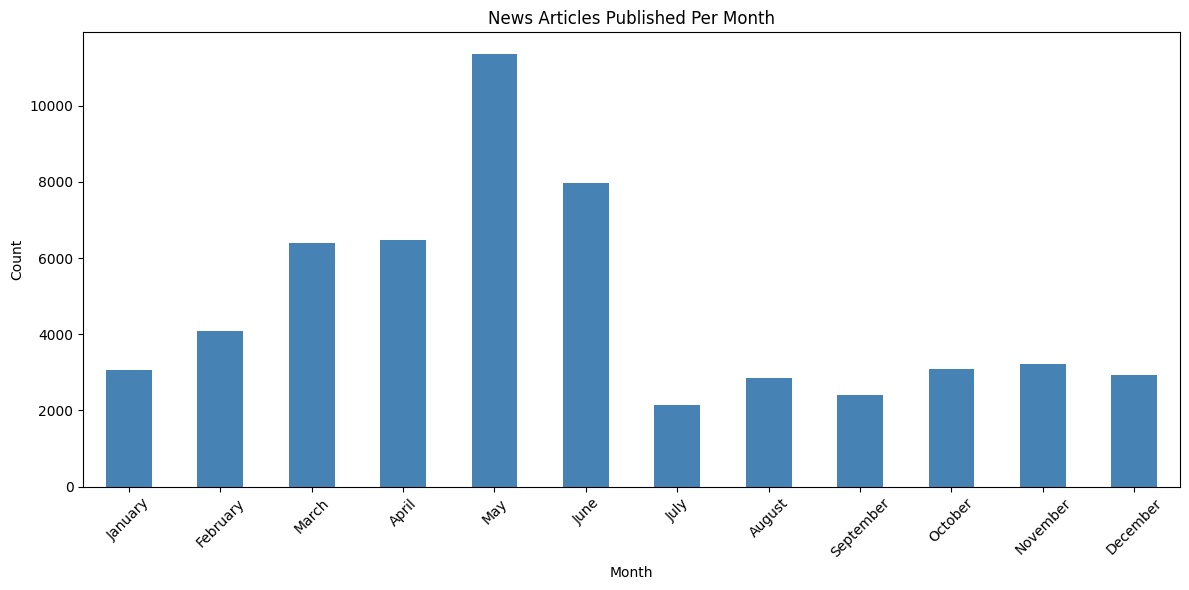

In [24]:
# Monthly trend
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
month_trend = df['publish_month'].value_counts().reindex(month_order)

# Plot monthly trend
month_trend.plot(kind='bar', figsize=(12, 6), color='steelblue')
plt.title('News Articles Published Per Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()